In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

<h2> Line chart </h2>

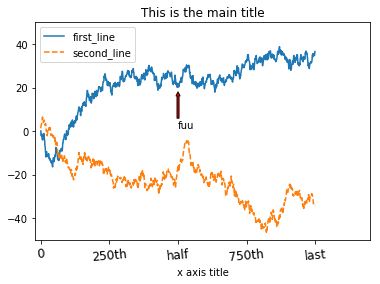

In [2]:
# Data
np.random.seed(2525)
x = np.arange(1000)
y1 = np.random.randn(1000).cumsum()
y2 = np.random.randn(1000).cumsum()

# Figure
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x,y1, label = 'first_line')
ax1.plot(x,y2,'--',label = 'second_line')

# x axis ticks and labels
# here we set the tick lables from the get-go, we could also acces them
# later by using ax1.get_ticklabels
xticks = ax1.set_xticks([0,250, 500, 750, 1000])
xlabels = ax1.set_xticklabels(['0','250th','half','750th','last'], rotation = 5, fontsize = 'large')

# Axis limits
ax1.set_xlim(-20,1200)
ax1.set_ylim(-50,50)

# titles
ax1.set_title('This is the main title')
ax1.set_xlabel('x axis title')

# legend 
ax1.legend(loc='best')

# Annotations
ax1.annotate('fuu',xy = (500,18), xytext = (500, 5)
             ,arrowprops = dict(facecolor = 'red',headwidth=4,width=2,headlength=4)
             ,horizontalalignment='left',verticalalignment='top')

fig

<h2>Filled area chart</h2>

C:\Users\ville_000\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


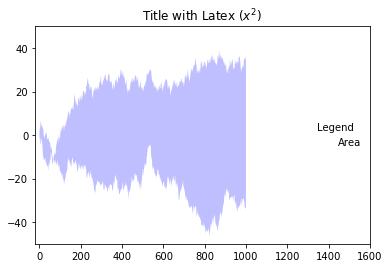

In [28]:
# Data
np.random.seed(2525)
x = np.arange(1000)
y1 = np.random.randn(1000).cumsum()
y2 = np.random.randn(1000).cumsum()

# Figure
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x,y1,linewidth = 0)
ax1.plot(x,y2,alpha = 0)

# Fill area between two lines
ax1.fill_between(range(len(y1)), 
                       y1, y2, 
                       facecolor='blue', 
                       alpha=0.25)

# Axis limits
ax1.set_xlim(-20,1600)
ax1.set_ylim(-50,50)

# legend 
ax1.legend(['Area'],loc=7, frameon=False, title='Legend')

ax1.set_title("Title with Latex ($x^2$) ")

fig

<h2> Histogram</h2>

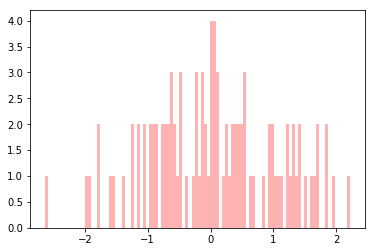

In [18]:
data = np.random.randn(100)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(data,bins=100, color = 'r', alpha=0.3)
fig

<h2>Figure with multilpe axes</h2>

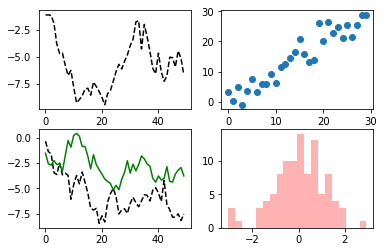

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(np.arange(50), np.random.randn(50).cumsum(), 'k--')
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.arange(50), np.random.randn(50).cumsum(), 'k--',
         np.arange(50), np.random.randn(50).cumsum(), 'g-')
ax4.hist(np.random.randn(100),bins=20, color = 'r',alpha=0.3)

fig

<h2>Plotting data frame data</h2>

Genus,A,B,C,D
one,0.889991,0.743312,0.379910,0.775085
two,0.996984,0.978573,0.010759,0.520591
three,0.739090,0.464743,0.105442,0.718419
four,0.435890,0.610954,0.963833,0.452084
five,0.323678,0.163873,0.894030,0.601084
six,0.224015,0.432111,0.646684,0.617356


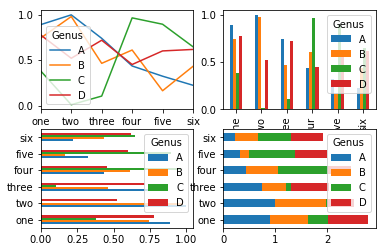

In [5]:
df = pd.DataFrame( np.random.rand(6,4)
                  ,index = ['one', 'two','three','four','five','six']
                  ,columns = pd.Index(['A','B','C','D'], name='Genus'))

display(df)
fig, axes = plt.subplots(nrows=2, ncols=2)
df.plot(ax=axes[0,0])
df.plot.bar(ax=axes[0,1])
df.plot.barh(ax=axes[1,0])
df.plot.barh(stacked = True, ax=axes[1,1])
plt.show()